## This notebook contains refactored code for:
- creating ~1km square box shapefiles for cement and steel data for China
- over ~1km is chosen so that the image chips are big enough to then crop down to the standard 256 x 256 pixels once the chips are downloaded
- Landcover polygons are also created around cement plants

In [1]:
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
from shapely.geometry import Point,Polygon, LineString
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import fiona
import numpy as np
import time


In [2]:
cempath = r'C:\Users\Georgios.Voulgaris\PycharmProjects\GeoMap\data'

steelpath = r'C:\\Users\\Maral.Bayaraa\\OneDrive - Satellite Applications Catapult\\Projects-Maral-Z\\SustainableFinance\\ALD_Phase2\\steel_polys\\'

In [3]:
def create_polys(path, filename, planttype):


    #open the file
    df = pd.read_excel(os.path.join(path, filename))


    #make sure there's no NaN location
    df = df[df['latitude'].notnull()]

    #define the geometry
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
    #Create a geodataframe
    geo_df = gpd.GeoDataFrame(df, geometry=geometry)
    geo_df.crs = ("epsg:4326")

    #Convert crs to UTM
    geo_df_UTM = geo_df.to_crs({'init':"EPSG:3395"})
    print(f"geo_df_UTM.crs: {geo_df_UTM.crs}")

    #create an AOI box
    #polygon_buffer= geo_df_UTM.buffer(500).envelope
    polygon_buffer= geo_df_UTM.buffer(700).envelope

    #Replace point data with polygon data
    geo_df_UTM['geometry'] = polygon_buffer

    geo_df_UTM['plantID']=np.arange(len(geo_df_UTM))

    '''Only include China
    '''

    df_china = geo_df_UTM[geo_df_UTM.iso3=='CHN']
    df_china = df_china[df_china.accuracy=='Exact']
    if planttype == 'cement':
        print('cement plant')
        df_china= df_china[df_china.plant_type == 'Integrated']
    else:
        print('steel plant')

    #for cement only: get integrated plants only

    return df_china

### STEEL

In [ ]:
steel = create_polys(steelpath,'steel_dataset_v3.1.xlsx','steel')

In [ ]:
#a.to_file(os.path.join(path,'2_steeldatasetv3_UTM_CHINA_exactlocPOLYS.geojson'), driver='GeoJSON')
steel.to_file(os.path.join(steelpath,'2_steeldatasetv3_UTM_CHINA_exactlocPOLYS_700m.geojson'), driver='GeoJSON')

Try to make the shapefile so that it extracts 256 by 256 pixels

### cement

In [4]:
cem = create_polys(cempath, 'SFI-Global-Cement-Database-July-2021.xlsx', 'cement')
cem.head()

C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


geo_df_UTM.crs: +init=epsg:3395 +type=crs
cement plant


,uid,city,state,country,iso3,country_code,region,sub_region,latitude,longitude,...,parent_exchange,parent_permid_2,parent_name_2,ownership_stake_2,parent_lei_2,parent_holding_status_2,parent_ticker_2,parent_exchange_2,geometry,plantID
295,GACTCHN0001,Wuhu Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,31.229955,118.380624,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13177370.783 3639798.392, 13178770.7...",295
296,GACTCHN0002,Yongzhou Shi,Hunan Sheng,China,CHN,156.0,Asia,Eastern Asia,26.720854,111.833275,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((12448523.227 3068731.797, 12449923.2...",296
297,GACTCHN0003,Wuhu Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,31.137582,118.169276,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13153843.632 3627837.769, 13155243.6...",297
298,GACTCHN0004,Qiannan Buyizumiaozuzizhizhou,Guizhou Sheng,China,CHN,156.0,Asia,Eastern Asia,26.615974,107.241019,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((11937315.627 3055736.669, 11938715.6...",298
299,GACTCHN0005,Xuancheng Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,30.687769,118.887302,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13233773.920 3569762.211, 13235173.9...",299


In [5]:
china2 = cem.set_crs(epsg = 3395, allow_override=True)

In [6]:
china2.head()

,uid,city,state,country,iso3,country_code,region,sub_region,latitude,longitude,...,parent_exchange,parent_permid_2,parent_name_2,ownership_stake_2,parent_lei_2,parent_holding_status_2,parent_ticker_2,parent_exchange_2,geometry,plantID
295,GACTCHN0001,Wuhu Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,31.229955,118.380624,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13177370.783 3639798.392, 13178770.7...",295
296,GACTCHN0002,Yongzhou Shi,Hunan Sheng,China,CHN,156.0,Asia,Eastern Asia,26.720854,111.833275,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((12448523.227 3068731.797, 12449923.2...",296
297,GACTCHN0003,Wuhu Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,31.137582,118.169276,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13153843.632 3627837.769, 13155243.6...",297
298,GACTCHN0004,Qiannan Buyizumiaozuzizhizhou,Guizhou Sheng,China,CHN,156.0,Asia,Eastern Asia,26.615974,107.241019,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((11937315.627 3055736.669, 11938715.6...",298
299,GACTCHN0005,Xuancheng Shi,Anhui Sheng,China,CHN,156.0,Asia,Eastern Asia,30.687769,118.887302,...,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((13233773.920 3569762.211, 13235173.9...",299


<AxesSubplot:>

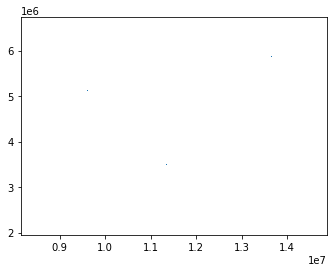

In [7]:
china2.plot()

In [8]:
china2.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
cem.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
china2.to_file(os.path.join(cempath, 'China_2.geojson'), driver='GeoJSON')

C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [11]:
cem.to_file(os.path.join(cempath,'4_cementdatasetv3_UTM_CHINA_exactlocPOLYS_1km.geojson'), driver='GeoJSON')

C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [12]:
import sys
import pyproj
import geopandas
print(sys.version)
print(pyproj.__version__)
print(geopandas.__version__)

3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:26:10) [MSC v.1929 64 bit (AMD64)]
3.3.0
0.10.2


In [13]:
import pyproj
pyproj.datadir.get_data_dir()

'C:\\Users\\Georgios.Voulgaris\\Anaconda3\\envs\\GeoEnv\\Library\\share\\proj'

# landcover

In [14]:
def get_lc_centrepoints(path, filename):
    '''Creates landcover samples around cement China plants
    '''

    #open the file
    df = pd.read_excel(os.path.join(path, filename))

    #make sure there's no NaN location
    df = df[df['latitude'].notnull()]

    #define the geometry
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
    #Create a geodataframe
    crs = {'init': 'epsg:4326'} #http://www.spatialreference.org/ref/epsg/2263/
    geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

    #Convert crs to UTM
    geo_df_UTM = geo_df.to_crs({'init':"EPSG:3395"})
    print(f"geo_df_UTM.crs: {geo_df_UTM.crs}")

    df_china = geo_df_UTM[geo_df_UTM.iso3=='CHN']
    df_china = df_china[df_china.accuracy=='Exact']
    df_china= df_china[df_china.plant_type == 'Integrated']
    # print(f"china: {df_china}")


    #create a HUGE buffer to sample landcover samples
    gdf_buffer=df_china.buffer(3500).envelope
    # print(f"gdf_buffer: {gdf_buffer.head()}")

    '''Intersect large squares so they do not interact with each other
    '''
    union = gdf_buffer.unary_union
    gdf_union = gpd.GeoDataFrame(crs=gdf_buffer.crs, geometry=[union])

    """
    gdf_union = gpd.GeoDataFrame()
    #Union the polygons so any that overlap become one

    gdf_union['geometry'] = gdf_buffer.unary_union
    # gdf_union['geometry'] = gdf_buffer # .unary_union
    gdf_union.crs={'init': 'EPSG:3395'}
    print(f"gdf_union: {gdf_union}")
    """

    '''Get the coordinates of the large polygons around which
    landcover samples will be generated
    '''

    # explodes multipolygon to polygon
    exploded = gdf_union.explode()

    #get the number of nodes in each polygon
    #coords_list = []
    point_list = []
    IDs = []
    for index, row in exploded.iterrows():
        #if row['geometry'].type == 'Polygon':
        coords = list(row['geometry'].exterior.coords)
        #onecoord = row['outlines'].exterior.coords

        #create a point for each coordinate
        for item in coords:
            points = Point(item)
            point_list.append(points)
            IDs.append(index)

    # print(id)
    # print(f"point_list: {point_list}")
    # print(f"IDs list: {IDs}")
    gdf_points = gpd.GeoDataFrame(columns=['id'])
    gdf_points['geometry'] = point_list
    #define the coordinates for the points
    gdf_points.crs = "EPSG:3395"
    # print(f"gdf: {gdf_points}")

    ''' Create the buffers around each landcover polygon
    '''
    polygon_buffer = gdf_points.buffer(700).envelope
    polygon_buffer = gpd.GeoDataFrame(columns=['ID'], crs=polygon_buffer.crs, geometry=polygon_buffer)
    # polygon_buffer.crs = "EPSG:3395"
    print(f"polygon buffer: {polygon_buffer}")

    """# print(f"point_list: {point_list}")
    # print(f"IDs list: {IDs}")
    gdf_points = gpd.GeoDataFrame()
    gdf_points['geometry'] = point_list
    #define the coordinates for the points
    gdf_points.crs = "EPSG:3395"
    print(f"gdf: {gdf_points}")

    ''' Create the buffers around each landcover polygon
    '''
    polygon_buffer= gdf_points.buffer(700).envelope
    polygon_buffer.crs = "EPSG:3395"
    print(f"polygon buffer: {polygon_buffer}")"""


    return polygon_buffer


In [15]:
lc = get_lc_centrepoints(cempath, 'SFI-Global-Cement-Database-July-2021.xlsx')
lc.head()

C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Georgios.Voulgaris\Anaconda3\envs\GeoEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


geo_df_UTM.crs: +init=epsg:3395 +type=crs


C:\Users\Georgios.Voulgaris\AppData\Local\Temp\ipykernel_18164\2084955817.py:51: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded = gdf_union.explode()


polygon buffer:        ID                                           geometry
0     NaN  POLYGON ((11244771.245 2487164.046, 11246171.2...
1     NaN  POLYGON ((11251771.245 2487164.046, 11253171.2...
2     NaN  POLYGON ((11251771.245 2480164.046, 11253171.2...
3     NaN  POLYGON ((11244771.245 2480164.046, 11246171.2...
4     NaN  POLYGON ((11244771.245 2487164.046, 11246171.2...
...   ...                                                ...
4363  NaN  POLYGON ((13718606.708 6514174.636, 13720006.7...
4364  NaN  POLYGON ((13718606.708 6507174.636, 13720006.7...
4365  NaN  POLYGON ((13711606.708 6507174.636, 13713006.7...
4366  NaN  POLYGON ((13711606.708 6514174.636, 13713006.7...
4367  NaN  POLYGON ((13718606.708 6514174.636, 13720006.7...

[4368 rows x 2 columns]


,ID,geometry
0,NaN,"POLYGON ((11244771.245 2487164.046, 11246171.2..."
1,NaN,"POLYGON ((11251771.245 2487164.046, 11253171.2..."
2,NaN,"POLYGON ((11251771.245 2480164.046, 11253171.2..."
3,NaN,"POLYGON ((11244771.245 2480164.046, 11246171.2..."
4,NaN,"POLYGON ((11244771.245 2487164.046, 11246171.2..."


In [17]:
# Add ID. Useful for the final stage
ID = []
i = 1
for i in range(4368):
    CHN = i
    ID.append(CHN)
    i = i+1
lc['ID'] = ID
print(lc)

        ID                                           geometry
0        0  POLYGON ((11244771.245 2487164.046, 11246171.2...
1        1  POLYGON ((11251771.245 2487164.046, 11253171.2...
2        2  POLYGON ((11251771.245 2480164.046, 11253171.2...
3        3  POLYGON ((11244771.245 2480164.046, 11246171.2...
4        4  POLYGON ((11244771.245 2487164.046, 11246171.2...
...    ...                                                ...
4363  4363  POLYGON ((13718606.708 6514174.636, 13720006.7...
4364  4364  POLYGON ((13718606.708 6507174.636, 13720006.7...
4365  4365  POLYGON ((13711606.708 6507174.636, 13713006.7...
4366  4366  POLYGON ((13711606.708 6514174.636, 13713006.7...
4367  4367  POLYGON ((13718606.708 6514174.636, 13720006.7...

[4368 rows x 2 columns]


    Now need to intersect with steel plants so we remove any lc polygon that touches steel plant samples --- had a look at the current data and actually this seems okay so ignoring here

In [ ]:
outpath = r'C:\Users\Georgios.Voulgaris\PycharmProjects\GeoMap\data'

In [ ]:
lc.to_file(os.path.join(outpath, 'LandCover_China_Cement.geojson'), driver='GeoJSON')

In [18]:
lc.head()

,ID,geometry
0,0,"POLYGON ((11244771.245 2487164.046, 11246171.2..."
1,1,"POLYGON ((11251771.245 2487164.046, 11253171.2..."
2,2,"POLYGON ((11251771.245 2480164.046, 11253171.2..."
3,3,"POLYGON ((11244771.245 2480164.046, 11246171.2..."
4,4,"POLYGON ((11244771.245 2487164.046, 11246171.2..."


In [19]:
lc.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
lc.dtypes

ID             int64
geometry    geometry
dtype: object